In [64]:
import sys
sys.path.append("/Users/danielmunson/dev/simple_net")

from pprint import pprint

In [65]:
import numpy as np
import matplotlib.pyplot as plt

from simple_net.components.network import Network
from simple_net.functions.utils import vectorize
from simple_net.functions.cost import (
    mean_squared_error,
    mse_gradient,
    arithmetic_mean
)
from simple_net.functions.activations import (
    sigmoid, ddx_sigmoid
)

from simple_net.misc.experimentation import generate_polynomial_map

In [66]:
layers = [3, 50, 100, 50, 3]
IN_DIMS = layers[0]
OUT_DIMS = layers[-1]
rand_poly, definition = generate_polynomial_map(IN_DIMS, OUT_DIMS)

NN = Network(
    layer_dims = layers,
    activations = [sigmoid for _ in layers], # will automatically vectorize
    activation_derivatives = [ddx_sigmoid for _ in layers], # will automatically vectorize
    cost_function = mean_squared_error,
    cost_gradient = mse_gradient,
    learning_rate = 1,
    gradient_aggregator = arithmetic_mean
)

In [67]:
MODE = "TEST" # {TEST, PROOF}

In [68]:
if MODE == "PROOF":
    # proof of gradient descent concept
    # show that average cost is apprx. monotonic decreasing over time
    test_features = [np.random.randn(IN_DIMS) for __ in range(500)]
    test_answers = [rand_poly(ftrs) for ftrs in test_features]
    for _ in range(200):
        NN.run_epoch(test_features, test_answers)


In [69]:
if MODE == "TEST":
    
    baseline_input = [1 for _ in range(IN_DIMS)]
    before = rand_poly(baseline_input)

    for _ in range(100):
        # twenty samples per batch
        test_features = [np.random.randn(IN_DIMS) for __ in range(5000)]
        test_answers = [rand_poly(ftrs) for ftrs in test_features]
        NN.run_epoch(test_features, test_answers)

    after = rand_poly(baseline_input)

    print('before:', before)
    print('after:', after)


before: [2 2 2]
after: [2 2 2]


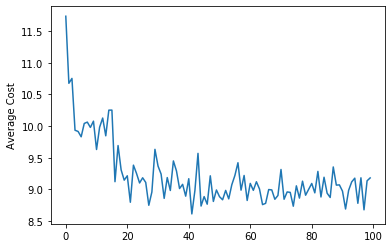

In [70]:
plt.plot(
    [i for i in range(len(NN._epochs))],
    [data['average_cost'] for data in NN._epochs]
)
plt.ylabel('Average Cost')
plt.show()